## CODIGO 

Alumno: Estrada Barragan Añlvaro Sandro 
Matricula: 240110052
[Índice](index.ipynb)

##CODIGO DE PRECIOS DE PRODUCTOS 

Tabla de Frecuencia Absoluta:
Rango
0 - 2      104
2 - 5       96
5 - 10     209
10 - 15     91
Name: count, dtype: int64

Tabla de Frecuencia Relativa:
Rango
0 - 2      0.208
2 - 5      0.192
5 - 10     0.418
10 - 15    0.182
Name: count, dtype: float64

Tabla de Frecuencia Acumulada:
Rango
0 - 2      104
2 - 5      200
5 - 10     409
10 - 15    500
Name: count, dtype: int64


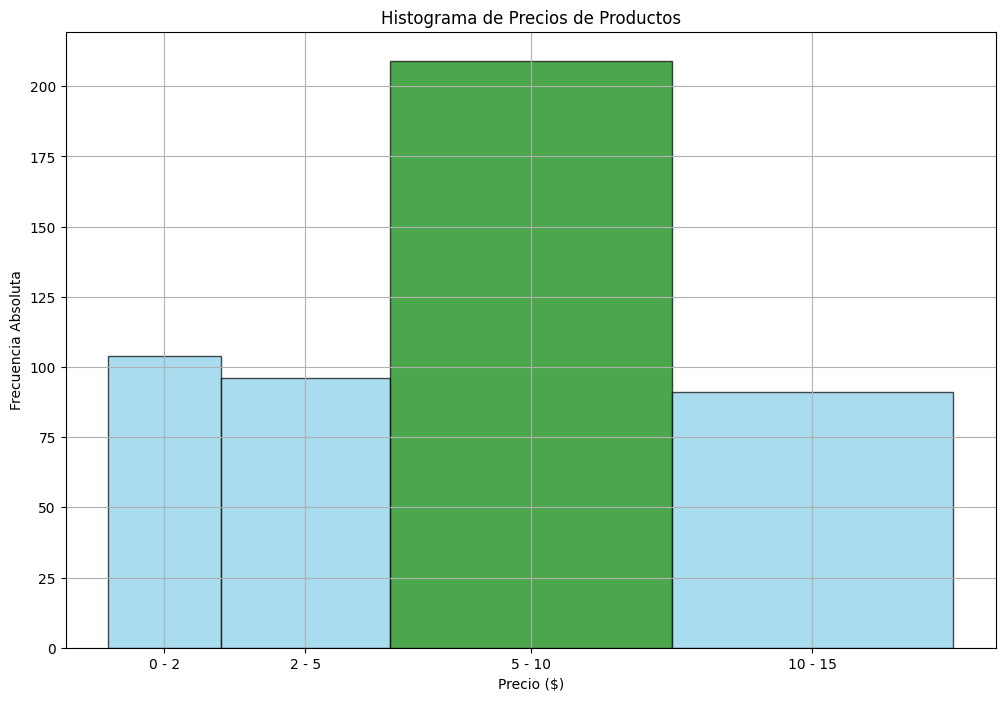

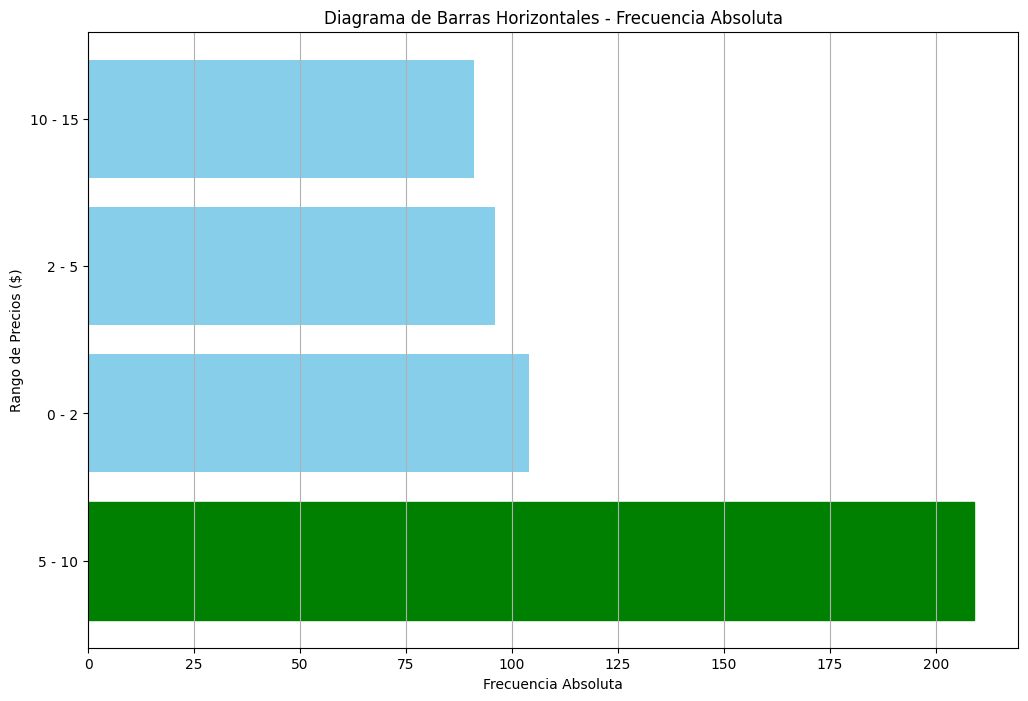

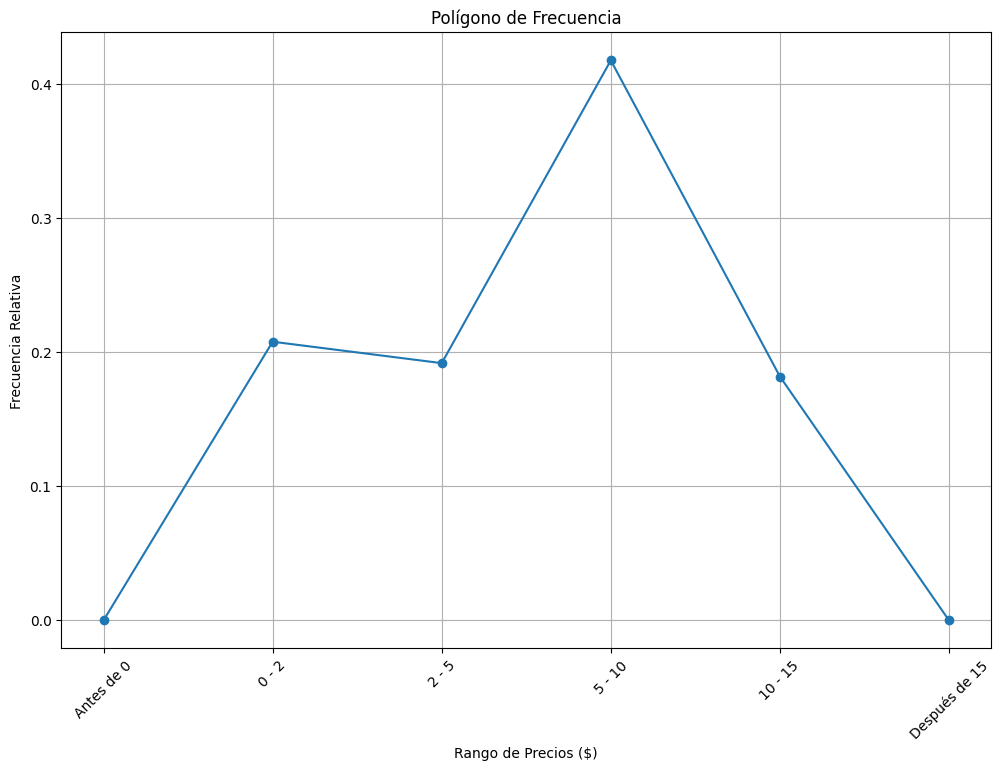

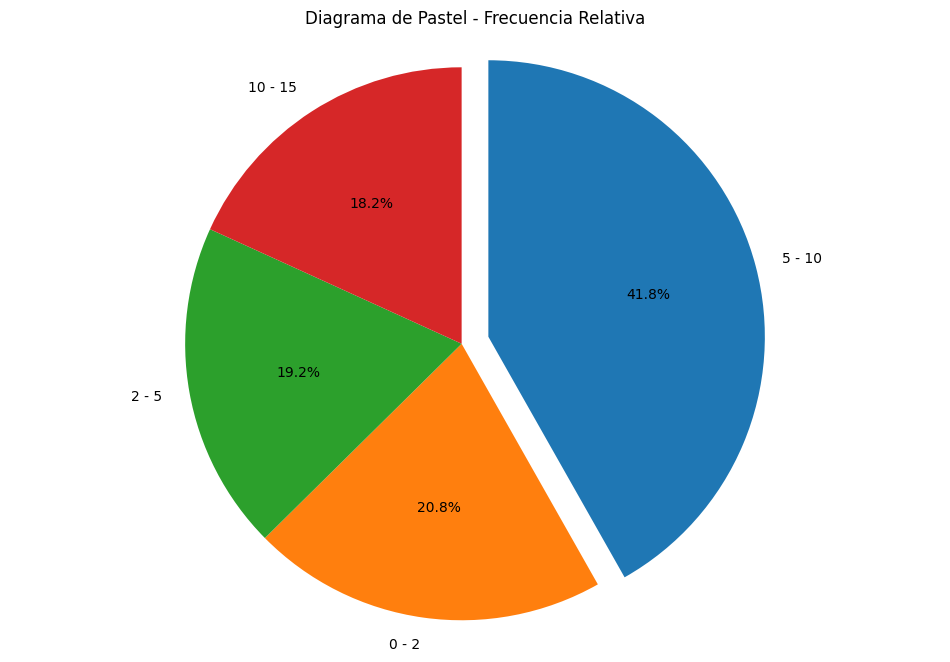

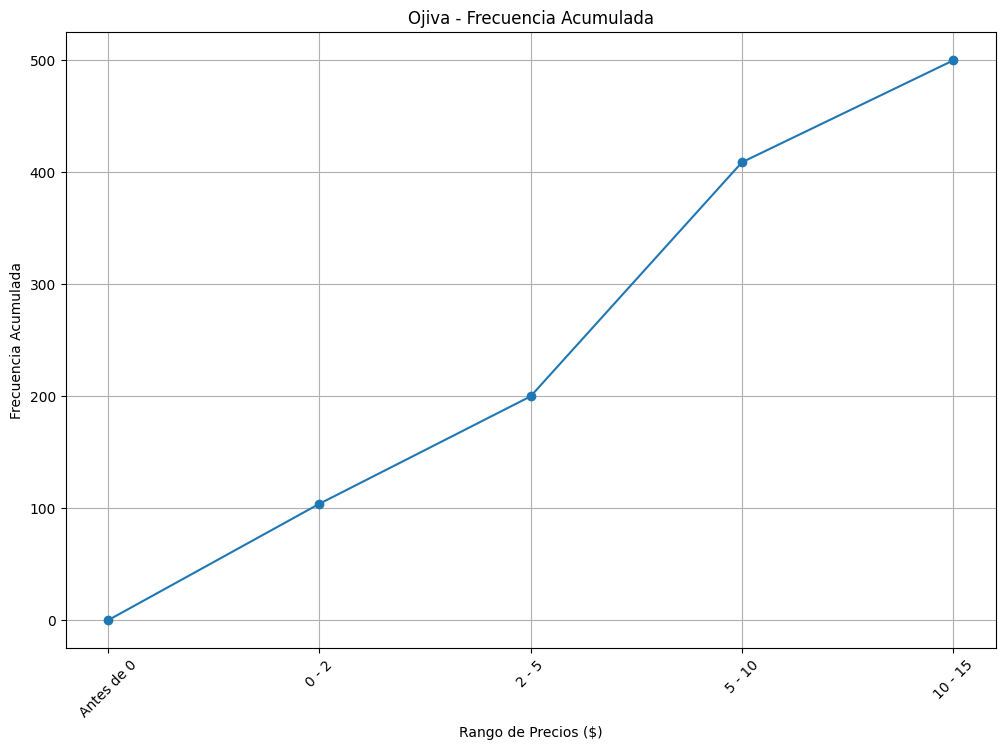

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Clases de precios
clases = [1.99, 3.49, 5.99, 9.99, 14.99]

# Generar 500 datos aleatorios
np.random.seed(0)  
datos = np.random.choice(clases, size=500, replace=True)

# Crear un DataFrame
df = pd.DataFrame(datos, columns=['Precio'])

# Definir los rangos
bins = [0 , 2 , 5 , 10 , 15 ]
labels = ['0 - 2', '2 - 5', '5 - 10', '10 - 15']

# Crear la tabla de frecuencia
df['Rango'] = pd.cut(df['Precio'], bins=bins, labels=labels, right=True)
tabla_frecuencia = df['Rango'].value_counts().sort_index()

# Frecuencia relativa
frecuencia_relativa = tabla_frecuencia / len(df)

# Frecuencia acumulada
frecuencia_acumulada = tabla_frecuencia.cumsum()

# Mostrar tablas
print("Tabla de Frecuencia Absoluta:")
print(tabla_frecuencia)

print("\nTabla de Frecuencia Relativa:")
print(frecuencia_relativa)

print("\nTabla de Frecuencia Acumulada:")
print(frecuencia_acumulada)

# Graficas

# Histograma
plt.figure(figsize=(12, 8))
counts, bins, patches = plt.hist(df['Precio'], bins=bins, edgecolor='black', alpha=0.7)

# Resaltar la barra
max_count_index = np.argmax(counts)
for i, patch in enumerate(patches):
    if i == max_count_index:
        patch.set_facecolor('green')  #mas alta
    else:
        patch.set_facecolor('skyblue')  # Color para las otras barras

plt.title('Histograma de Precios de Productos')
plt.xlabel('Precio ($)')
plt.ylabel('Frecuencia Absoluta')
# Centrar las etiquetas de los precios en las barras
plt.xticks(bins[:-1] + np.diff(bins) / 2, labels)  # Usar labels para los rangos
plt.grid()
plt.show()

# Diagrama de barras horizontales
plt.figure(figsize=(12, 8))
sorted_freq = tabla_frecuencia.sort_values(ascending=True)
indices_reversed = sorted_freq.index[::-1]
values_reversed = sorted_freq.values[::-1]

bars = plt.barh(indices_reversed, values_reversed, color='skyblue')

max_freq = sorted_freq.max()
for bar in bars:
    if bar.get_width() == max_freq:
        bar.set_color('green')  
plt.title('Diagrama de Barras Horizontales - Frecuencia Absoluta')
plt.xlabel('Frecuencia Absoluta')
plt.ylabel('Rango de Precios ($)')
plt.grid(axis='x')
plt.show()

# Poligono de frecuencia
plt.figure(figsize=(12, 8))
extended_indices = ['Antes de 0'] + list(frecuencia_relativa.index) + ['Después de 15']
extended_values = [0] + list(frecuencia_relativa.values) + [0]
plt.plot(extended_indices, extended_values, marker='o')
plt.title('Polígono de Frecuencia')
plt.xlabel('Rango de Precios ($)')
plt.ylabel('Frecuencia Relativa')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Diagrama de pastel para frecuencia relativa
plt.figure(figsize=(12, 8))
valid_indices = frecuencia_relativa[frecuencia_relativa > 0].sort_values(ascending=False).index
valid_frec_rel = frecuencia_relativa[frecuencia_relativa > 0].sort_values(ascending=False)
explode = [0.1 if i == 0 else 0 for i in range(len(valid_frec_rel))]
plt.pie(valid_frec_rel, labels=valid_indices, autopct='%1.1f%%', startangle=90, explode=explode, counterclock=False)
plt.title('Diagrama de Pastel - Frecuencia Relativa')
plt.axis('equal')  # Para que el pastel sea circular
plt.show()

# Ojiva
plt.figure(figsize=(12, 8))
extended_indices = ['Antes de 0'] + list(frecuencia_acumulada.index)
extended_values = [0] + list(frecuencia_acumulada.values)
plt.plot(extended_indices, extended_values, marker='o')
plt.title('Ojiva - Frecuencia Acumulada')
plt.xlabel('Rango de Precios ($)')
plt.ylabel('Frecuencia Acumulada')
plt.xticks(rotation=45)
plt.grid()
plt.show()